In [1]:
cd C:\Users\User\Downloads

C:\Users\User\Downloads


In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import numpy.random as npr
import pandas as pd
import seaborn as sns
%matplotlib inline

In [4]:
#reading the dataset in a datafrom using Pandas
dataset = pd.read_csv("winequality.csv")
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
dataset.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
#check null or missing value
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

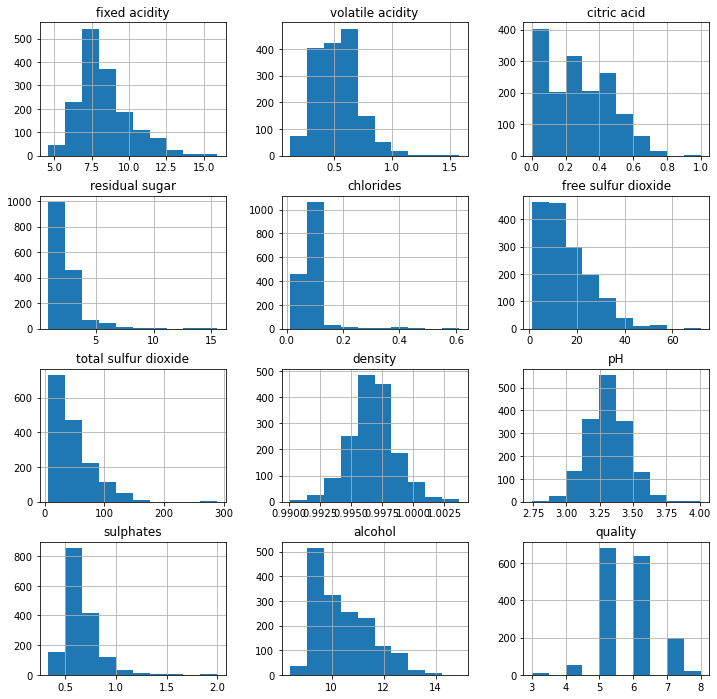

In [8]:
dataset.hist(figsize = (12, 12))

<AxesSubplot:ylabel='Frequency'>

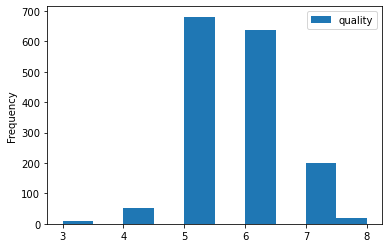

In [9]:
df=pd.DataFrame(dataset)
dataset.plot(kind='hist',y='quality')


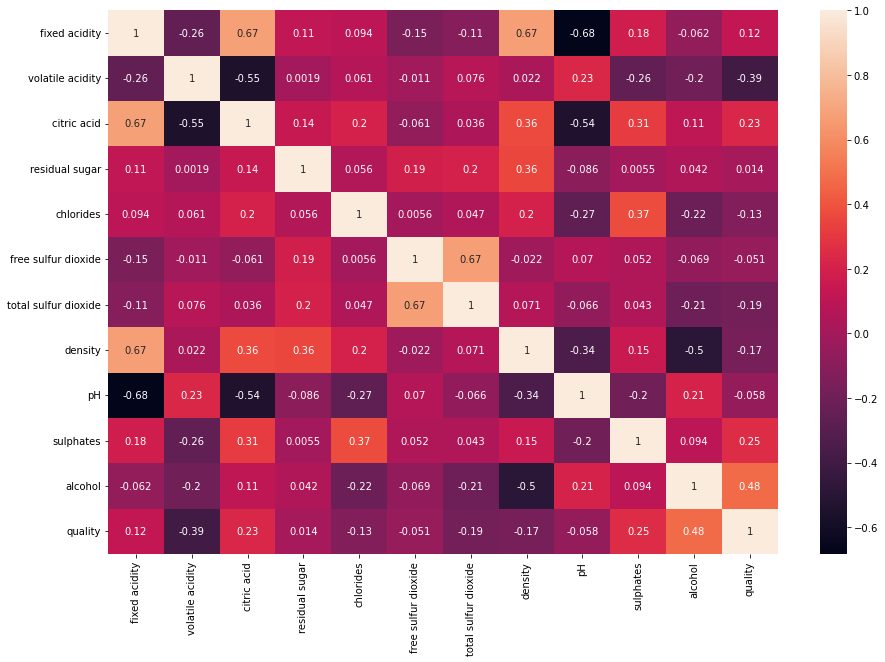

In [10]:
corr=dataset.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)
plt.show()

In [11]:
dataset['quality']=dataset['quality'].apply(lambda x: 1 if x>=7 else 0)

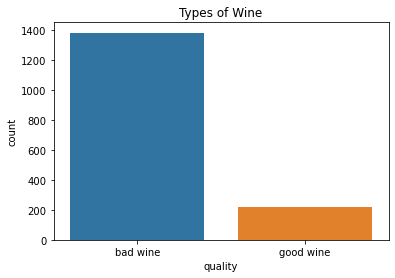

In [12]:
sns.countplot(data=dataset, x='quality')
plt.xticks([0,1],['bad wine','good wine'])
plt.title('Types of Wine')
plt.show()

In [13]:
#parameter for requires seed
random_value=1000

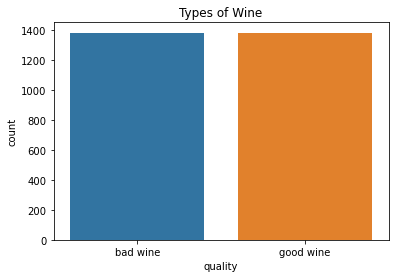

In [14]:
from imblearn.over_sampling import SMOTE
X = dataset[['fixed acidity', 'volatile acidity', 'sulphates', 'alcohol', 'density']]
y = dataset.quality
oversample = SMOTE()
X_ros, y_ros = oversample.fit_resample(X, y)
sns.countplot(x=y_ros)
plt.xticks([0,1], ['bad wine','good wine'])
plt.title("Types of Wine")
plt.show()

### SVM ML

In [22]:
# split dataset to train and test variable 
# use test size of 20% of the data proportion
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=random_value)
X_train.shape, X_test.shape

((2211, 5), (553, 5))

In [23]:
#feature scaling and standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(X_train)
x_test=sc.fit_transform(X_test)

In [30]:
#I'll use Kernel SVM model to classify.
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',C=1, gamma='auto')
classifier.fit(X_train, y_train)
#Predicting the Test Set
y_pred = classifier.predict(X_test)
print(y_pred)

[1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1
 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0
 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 0 0 1
 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1
 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0
 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0
 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1
 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0
 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1
 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0
 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1
 1 1 1 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0
 1 0 1 0 0 1 0 0 1 1 1 0 

Confusion Matrix:
 [[212  67]
 [ 40 234]]
Accuracy:
  0.81


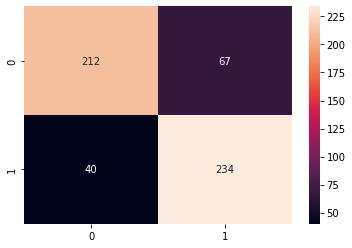

In [33]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix:\n',cm)
sns.heatmap(cm,annot=True,fmt='2.0f')
from sklearn import metrics
cm1=metrics.accuracy_score(y_test,y_pred)
print('Accuracy:\n',"% 0.2f"%cm1)


In [34]:
class_report = metrics.classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       279
           1       0.78      0.85      0.81       274

    accuracy                           0.81       553
   macro avg       0.81      0.81      0.81       553
weighted avg       0.81      0.81      0.81       553



### KNN ML

In [37]:
#train the model
#fitting classifier to the training set
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

k_range = range(1,25)
scores = {}
scores_list = []
for k in k_range:
    classifier=KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    scores[k]=metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

In [38]:
scores

{1: 0.9204339963833634,
 2: 0.9150090415913201,
 3: 0.8896925858951176,
 4: 0.8933092224231465,
 5: 0.864376130198915,
 6: 0.8679927667269439,
 7: 0.8444846292947559,
 8: 0.8444846292947559,
 9: 0.8264014466546112,
 10: 0.8354430379746836,
 11: 0.8282097649186256,
 12: 0.8227848101265823,
 13: 0.8047016274864376,
 14: 0.810126582278481,
 15: 0.810126582278481,
 16: 0.8155515370705244,
 17: 0.8010849909584087,
 18: 0.8083182640144665,
 19: 0.7974683544303798,
 20: 0.8028933092224232,
 21: 0.7938517179023508,
 22: 0.8010849909584087,
 23: 0.7992766726943942,
 24: 0.8028933092224232}

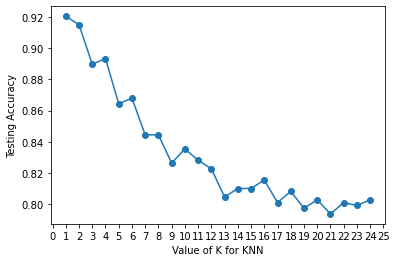

In [39]:
#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.scatter(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]);

In [40]:
#here, i choose 1.0 as my k_value
classifier = KNeighborsClassifier(n_neighbors = 1)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [41]:
#predicting the test set results
y_pred=classifier.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,

Confusion Matrix:
 [[242  37]
 [  7 267]]
Accuracy:
  0.92


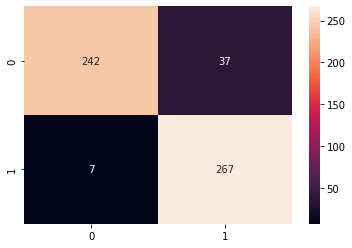

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix:\n',cm)
sns.heatmap(cm,annot=True,fmt='2.0f')

cm1=metrics.accuracy_score(y_test,y_pred)
print('Accuracy:\n',"% 0.2f"%cm1)

In [44]:
class_report = metrics.classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.97      0.87      0.92       279
           1       0.88      0.97      0.92       274

    accuracy                           0.92       553
   macro avg       0.93      0.92      0.92       553
weighted avg       0.93      0.92      0.92       553

